# Three Wheeled Robot Kinematic Model

The mathematical framework known as "Differential Drive Kinematics" pertains to the kinematics of a three-wheeled robot. It elucidates how the robot shifts its position and orientation in response to the velocities of its two controllable wheels. Such robots, distinguished by two independently operable wheels typically aligned on a shared axis along with a caster wheel or another passive support, find widespread application in mobile robots, robotic platforms, and certain types of robotic vehicles.



---



Python Simulation of the
movement of that robot that
includes:
o Take (Vx, Vy, omega) and
return the angular velocity on
each motor

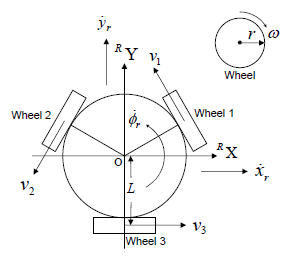

In [2]:
import numpy as np

In [8]:
# Define constants
L = 0.2
r = 0.1  # Assuming radius of each wheel is 0.1 m

**Matrix form of The Kinemtic model**

\begin{bmatrix} \omega_1 \\ \omega_2 \\ \omega_3 \end{bmatrix} = 1/r\begin{bmatrix} 0 & -\frac{1}{2} & \frac{\sqrt{3}}{2} \\ 0 & -\frac{1}{2} & -\frac{\sqrt{3}}{2} \\ 1 & 0 & 0 \end{bmatrix} \begin{bmatrix} V_x' \\ V_y' \\ \phi_r' \end{bmatrix}

In [9]:
# Define the velocity matrix
def calculate_velocity(xr, xr_prime):
    v1 = np.array([-1/2 * xr_prime[0] + np.sqrt(3)/2 * xr_prime[1] + L * xr_prime[2]])
    v2 = np.array([-1/2 * xr_prime[0] - np.sqrt(3)/2 * xr_prime[1] + L * xr_prime[2]])
    v3 = np.array([xr_prime[0] + L * xr_prime[2]])
    return np.vstack((v1, v2, v3))

In [10]:
# Define the function to calculate angular velocities
def calculate_angular_velocities(vx, vy, omega):
    v_matrix = np.array([[0, -1/2, np.sqrt(3)/2],
                         [0, -1/2, -np.sqrt(3)/2],
                         [1, 0, 0]])

    vr = np.array([[vx],
                   [vy],
                   [L * omega]])

    omega = np.linalg.solve(v_matrix, vr)
    return omega


**Convert from the local frame of robot to the
global frame of the world using a rotational matrix**


\begin{bmatrix}
    Vx \\
    Vy \\
    W
\end{bmatrix}
=
\begin{bmatrix}
    \cos(\theta) & -\sin(\theta) & 0 \\
    \sin(\theta) & \cos(\theta) & 0 \\
    0 & 0 & 1
\end{bmatrix}
\begin{bmatrix}
    vx \\
    vy \\
    \omega
\end{bmatrix}



In [23]:
theta = 60
rot = np.array([[np.cos(theta * (np.pi/180)),-np.sin(theta * (np.pi/180)),0],
             [np.sin(theta * (np.pi/180)),np.cos(theta * (np.pi/180)),0],
             [0,0,1]])

# vg = rot @ vl
# print(f"vg: \n{np.round(vg,2)}")

In [24]:
if __name__ == "__main__":
    # Input velocities
    vx = 0.1
    vy = 0.2
    omega = 0.3

    # Calculate angular velocities
    angular_velocities = calculate_angular_velocities(vx, vy, omega)
    W1 = angular_velocities[0, 0]
    W2= angular_velocities[1, 0]
    W3= angular_velocities[2, 0]
    print(f"Angular velocity of first wheel: {W1}")
    print(f"Angular velocity of second wheel: {W2}")
    print(f"Angular velocity of third wheel: {W3}")


    # Define the local velocities as a column vector
    local_velocities = np.array([[vx], [vy], [omega]])

    # Perform matrix multiplication
    global_velocities = np.dot(rot, local_velocities)

    # Extract global velocities
    Vx = global_velocities[0, 0]
    Vy = global_velocities[1, 0]
    W = global_velocities[2, 0]

    # Print the results
    print(f"Global Vx: {Vx}")
    print(f"Global Vy: {Vy}")
    print(f"Global Omega: {W}")

Angular velocity of first wheel: 0.06
Angular velocity of second wheel: -0.30000000000000004
Angular velocity of third wheel: -0.05773502691896258
Global Vx: -0.12320508075688771
Global Vy: 0.1866025403784439
Global Omega: 0.3
